In [61]:
#Processing using NumPy and Pandas
import pandas as pd
import numpy as np

#Loading the Data Set
file_path = '/diabetes.csv'
data = pd.read_csv(file_path)
data.head(), data.info()

#Finding the missing values
missing_values = data.isnull().sum()
missing_values

columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

data[columns_with_zeros] = data[columns_with_zeros].replace(0, np.nan)

missing_values = data.isnull().sum()
missing_values

# Checking for missing values before filling it
missing_values = data.isnull().sum()
print("Missing values before imputation\n", missing_values)

#Using the median to fill the missing values
data.fillna(data.mean(), inplace=True)

# Checking for missing values after filling it
missing_values_after_imputation = data.isnull().sum()
print("Missing values after imputation\n", missing_values_after_imputation)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
Missing values before imputation
 Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigr

Text(0.5, 1.0, 'BMI vs Outcome')

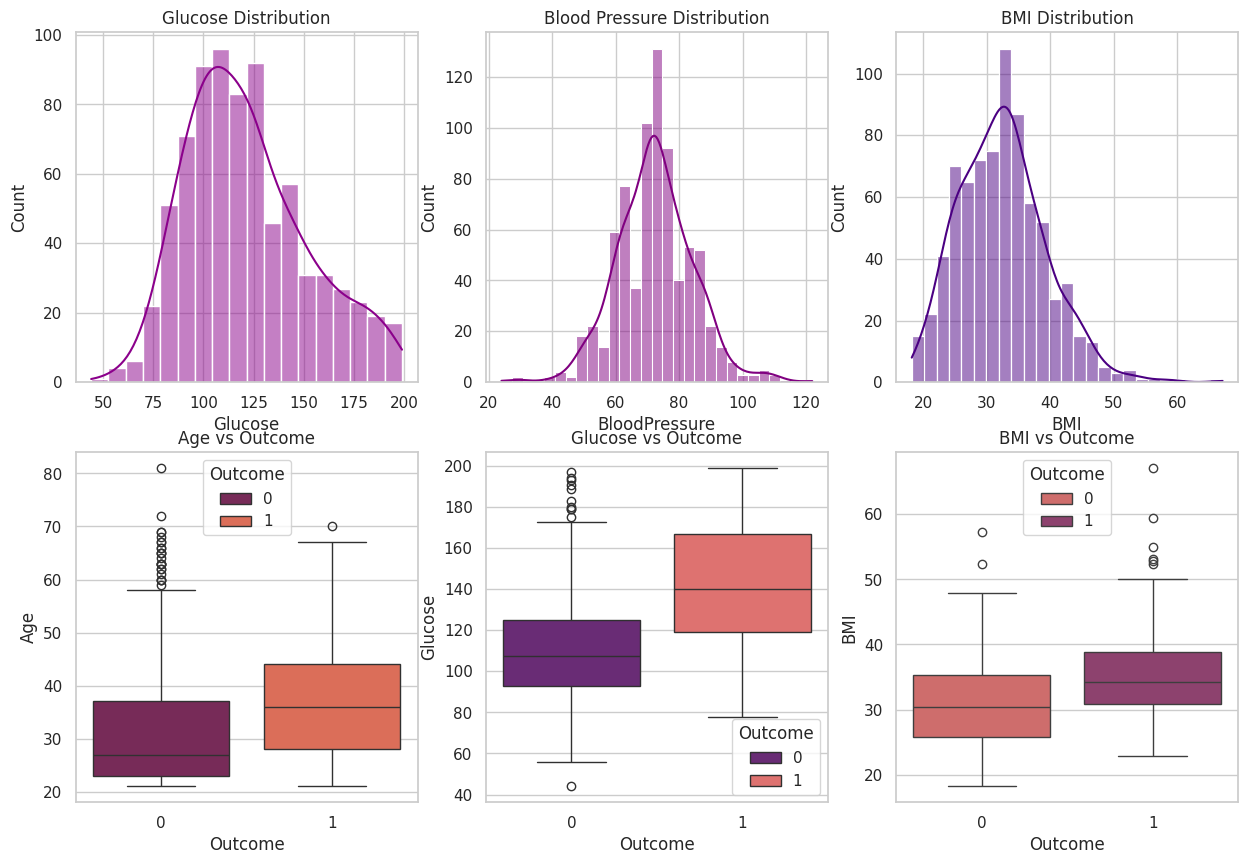

In [57]:
#Visualizing using Matplotlib and Seaborn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

data.describe()

sns.set(style='whitegrid')

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

#Distribution Feature
sns.histplot(data['Glucose'], kde=True, ax=axs[0, 0], color='darkmagenta').set_title('Glucose Distribution')
sns.histplot(data['BloodPressure'], kde=True, ax=axs[0, 1], color='purple').set_title('Blood Pressure Distribution')
sns.histplot(data['BMI'], kde=True, ax=axs[0, 2], color='indigo').set_title('BMI Distribution')

#Relations feature
sns.boxplot(x='Outcome', y='Age', data=data, ax=axs[1, 0],hue='Outcome', palette='rocket').set_title('Age vs Outcome')
sns.boxplot(x='Outcome', y='Glucose', data=data, ax=axs[1, 1],hue='Outcome', palette= 'magma').set_title('Glucose vs Outcome')
sns.boxplot(x='Outcome', y='BMI', data=data, ax=axs[1, 2],hue='Outcome', palette ='flare' ).set_title('BMI vs Outcome')


In [65]:
#Applying Machine Learning Algorithms
from sklearn.preprocessing import StandardScaler

# Identifying
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [66]:
# Spliting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# scaling data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

# building model
from sklearn.svm import SVC
svm = SVC()

# Using SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# scaling the test data and score the scaled data
X_test_scaled = scaler.transform(X_test)

svm.score(X_test_scaled, y_test)


0.7337662337662337